# Dataset Preparation

In [30]:
import numpy as np
import os
from pathlib import Path
from keras_preprocessing import image

In [31]:
path = Path("./images")

print(type(path))
print(path)

dirs = path.glob("*") #Creating a Generator to iterate over each folder

<class 'pathlib.PosixPath'>
images


In [32]:
#This is to represent different categories/labels in form of numbers


label_dict = {
    "cat" : 0,
    "dog" : 1,
    "horse" : 2,
    "human" : 3
}


In [33]:
# Load all the Images out there
image_data = [] # X Matrix
    
labels = [] # Y Vector

for folder in dirs:
    
    label = str(folder).split("/")[-1][:-1]
    # Load all the images i.e. X matrix along with Labels i.e. Y vector
    
    for image_path in folder.glob("*.jpg"):
        
        img = image.load_img(image_path, target_size = (200, 200)) # Loading an image using Keras
        
        # Converting loaded image into a numpy arr ay
        img_array = image.img_to_array(img)
        
        # Prepare X Matrix
        image_data.append(img_array)
        # Prepare Y Vector
        labels.append(label_dict[label]) 

In [34]:
len(image_data)

808

In [35]:
print(labels)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 

### Preparing a Numpy array

In [36]:
x = np.array(image_data)
y = np.array(labels)
print(x.shape, y.shape)

(808, 200, 200, 3) (808,)


```x.shape``` signifies that there are ```808``` images each of ```32X32X3``` size

### Shuffle the Data 

In [37]:
import random 

combined_data = list(zip(x, y))
random.shuffle(combined_data)

In [38]:
x[:], y[:] = zip(*combined_data)

### Have a look at Dataset

In [39]:
x = x.astype("uint8")

In [61]:
x[0].shape

(120000,)

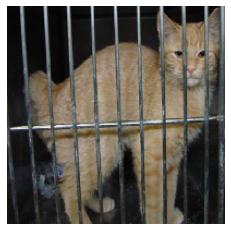

In [64]:
plt.imshow(x[0].reshape((200, 200, -1)))
plt.axis("off");

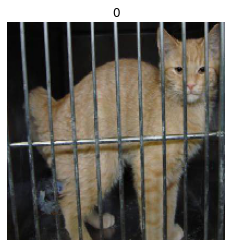

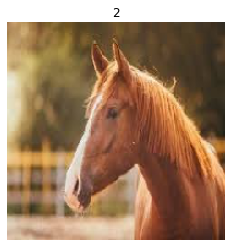

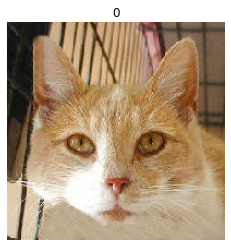

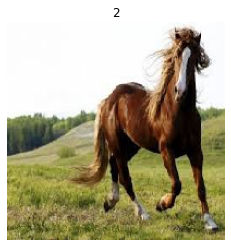

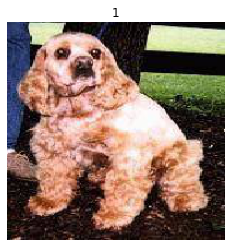

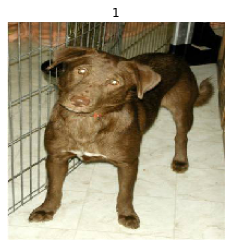

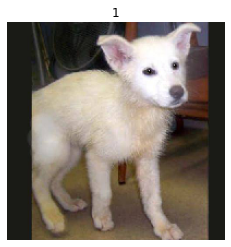

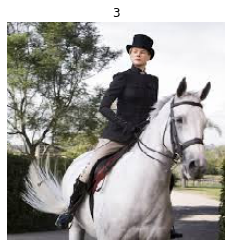

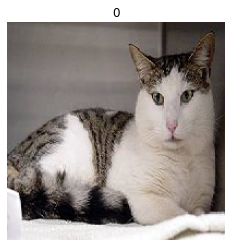

In [41]:
import matplotlib.pyplot as plt

# will be viusalizing only 9 images 
for i in range(9):
    plt.imshow(x[i])
    plt.axis("off")
    plt.title(y[i])
    plt.show()    

In [42]:
class SVM:
    
    def __init__(self, C = 1.0):
        self.C = C
        self.W = 0
        self.b = 0
        
        
        
    
    def HingeLoss(self, W, B, X, Y):
                
        loss = 0.0
        loss += 0.5 * np.dot(W, W.T) #First Term
        
        m = X.shape[0]
        
        for i in range(m):
            
            ti = Y[i] * (np.dot(W, X[i].T) + B)
            
            loss += self.C * max(0, (1 - ti)) # 1 - ti is for outliers
        
        return loss
    
    
    
    
    def fit(self, X, Y, batch_size = 100, Lr = 0.001, MaxItr = 20):
        
        #Initialization
        features = X.shape[1]
        samples  = X.shape[0]
        c = self.C        
        W = np.zeros((1, features))
        bias = 0     
        losses = []
        
        
        for i in range(MaxItr):
            
            losses.append(*self.HingeLoss(W, bias, X, Y)[0]) # Loss gets recorded   
            
            random_ids = np.arange(samples)
            np.random.shuffle(random_ids)
            
            for batch_start in range(0, samples, batch_size):
                
               
                Gradient_W = 0.0 # Used to compute gradient term only
                Gradient_B = 0.0 # That is why it gets initialized by 0 everytime
                
                for j in range(batch_start, batch_start + batch_size):
                    
                    if j < samples:
                
                        # Dealing with Random Data
                        i = random_ids[j]

                        ti = Y[i] * (np.dot(W, X[i]) + bias)
                        
                        if ti > 1:
                            "All Good"
                            Gradient_W += 0
                            Gradient_B += 0
                       
                        else:
                            
                            Gradient_W += c*Y[i]*X[i]
                            Gradient_B += c*Y[i]

                # Gradient is computed. Now it is needed to update the W and B
                W = W - Lr * W + Lr * Gradient_W
                bias = bias + Lr * Gradient_B
            
        self.W = W 
        self.b = bias
        
        return W, bias, list(losses)

## We need to convert Data for One-to-One Classification

In [43]:
x.shape

(808, 200, 200, 3)

In [44]:
# We will flatten each image

x = x.reshape((808, -1))
print(x.shape)

(808, 120000)


In [45]:
classes = len(np.unique(labels))
classes

4

In [46]:
def ClassWiseData(x, y):
    
    data = {} # It will contain key as classes and values as numpy array
    
    for i in range(classes):        
        data[i] = [] # Creating an empty list to further store images
    
    
    for i in range(x.shape[0]): # Iterating over all the data points
        data[y[i]].append(x[i])
        
        
    for i in data.keys():
        data[i] = np.array(data[i])
        
    return data

In [47]:
data = ClassWiseData(x, y)

In [48]:
print(data[0].shape)
print(data[1].shape)
print(data[2].shape)
print(data[3].shape)

(202, 120000)
(202, 120000)
(202, 120000)
(202, 120000)


##  Creating Data Pairs

In [58]:
def CreateDataPairs(d1, d2):
    
    l1 = l2 = 1
    
    samples = l1 + l2
    features = d1.shape[0]
    
    data_pair = np.zeros((samples, features))
    data_labels = np.zeros((samples, ))
    
    data_pair[:l1, :] = d1
    data_pair[l1:, :] = d2
    
    data_labels[:l1] = -1
    data_labels[:l2] = 1
    
    return data_pair, data_labels
    
    

In [50]:
mySVM = SVM()

## Training NC2 SVM's Part!

In [51]:
def trainSVM(x, y):
    
    svm_classifier = {}
    
    for i in range(classes):
        
        svm_classifier[i] = {}
        
        for j in range(i + 1, classes):
            xpair, ypair = CreateDataPairs(data[i], data[j])
            weight, bias, _ = mySVM.fit(xpair, ypair)
            
            svm_classifier[i][j] = (weight, bias)
            
    return svm_classifier

In [52]:
svm_classifier = trainSVM(x, y)

In [53]:
svm_classifier

{0: {1: (array([[5.05469967, 4.39988013, 4.22055196, ..., 5.08277631, 4.53120632,
           4.27127104]]),
   0.051000000000000004),
  2: (array([[4.54116899, 4.24047731, 3.88634945, ..., 5.25757599, 4.5810197 ,
           4.28123371]]),
   0.048),
  3: (array([[5.32640903, 4.8753715 , 4.6226818 , ..., 4.81559544, 4.38810606,
           3.93706853]]),
   0.048)},
 1: {2: (array([[5.31191786, 5.36354264, 5.17244039, ..., 5.44324405, 5.07553072,
           3.9071805 ]]),
   0.047),
  3: (array([[6.2601835 , 6.09896929, 5.83359982, ..., 5.74121864, 4.99220652,
           4.02401553]]),
   0.051000000000000004)},
 2: {3: (array([[5.97398299, 6.43770028, 6.47664529, ..., 5.93775507, 5.58362721,
           4.05299786]]),
   0.048)},
 3: {}}

In [54]:
def binaryPredict(x, weight, bias):
    z = np.dot(x, weight.T) + bias
    
    if z >= 0:
        return 1
    else:
        return -1

In [55]:
def predict(x):
    
    count = np.zeros((classes, ))
    
    for i in range(classes):
        
        for j in range(i+1, classes):
            
            weight, bias = svm_classifier[i][j]
            
            # Take Majority Prediction : What each classifier predicted the most
            
            z = binaryPredict(x, weight, bias)
            
            if z == 1:
                count[j] += 1
            
            else:
                count[i] += 1
    final_prediction = np.argmax(count)
    
    return final_prediction

In [56]:
def accuracy(x, y):
    
    count = 0
    
    for i in range(x.shape[0]):
        prediction = predict(x[i])
        
        if prediction == y[i]:
            count += 1
        
    return count/x.shape[0]

In [57]:
accuracy(x, y)

0.25

# DEBUG!!!

In [59]:
# Check only for 2 classes and see whether the loss is increasing or decreasing

xp, yp = CreateDataPairs(x[0], x[1]) # Feeding cat and dog data

In [65]:
weight, bias, loss = mySVM.fit(xp, yp)

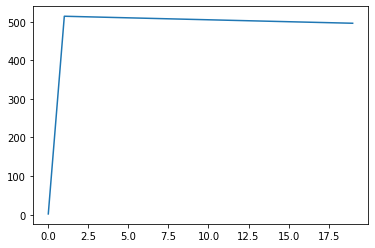

In [66]:
plt.plot(loss)

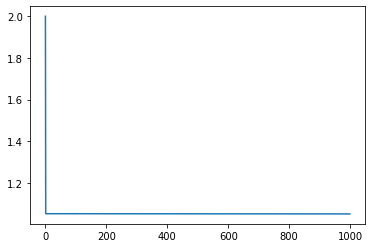

In [68]:
# Adjusting Learning Rate -> MaxItr

weight, bias, loss = mySVM.fit(xp, yp, Lr = 0.00001, MaxItr = 1000)
plt.plot(loss);